In [1]:
from statistics import mean
from csv import DictReader

In [2]:
from matplotlib import pyplot
from matplotlib import ticker
from matplotlib import rcParams
from scipy.stats import pearsonr, spearmanr

In [3]:
locationFiles = []

with open("formatted_data/locations_final.csv", "r", encoding="utf-8") as locationsCsvFile:
    reader = DictReader(locationsCsvFile)
    for row in reader:
        locationFiles.append(row["ref"] +".csv")

In [4]:
monthCounts = []
monthCountsLookup = {}

for locationFile in locationFiles:
    with open(f"formatted_data/{locationFile}", "r", encoding="utf-8") as locationCsvFile:
        reader = DictReader(locationCsvFile)
        for row in reader:
            year = row["yyyy"]
            month = row["mm"]
            monthId = f"{year}-{month}"
            if monthId in monthCountsLookup:
                monthCounts[monthCountsLookup[monthId]]["COUNT"] += 1
                #monthCounts[monthCountsLookup[monthId]]["STATIONS"].append(locationFile.split("data.")[0])
            else:
                monthCountsLookup[monthId] = len(monthCounts)
                monthCounts.append({
                    "YEAR": int(year),
                    "MONTH": int(month),
                    "DISPLAY": monthId,
                    "COUNT": 1
                    #"STATIONS": [locationFile.split("data.")[0]]
                })

monthCounts.sort(key=lambda x: (x["YEAR"], x["MONTH"]))

#print("\n".join([str(month["YEAR"]) +"-"+ str(month["MONTH"]) for month in monthCounts]))

In [5]:
pyplot.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

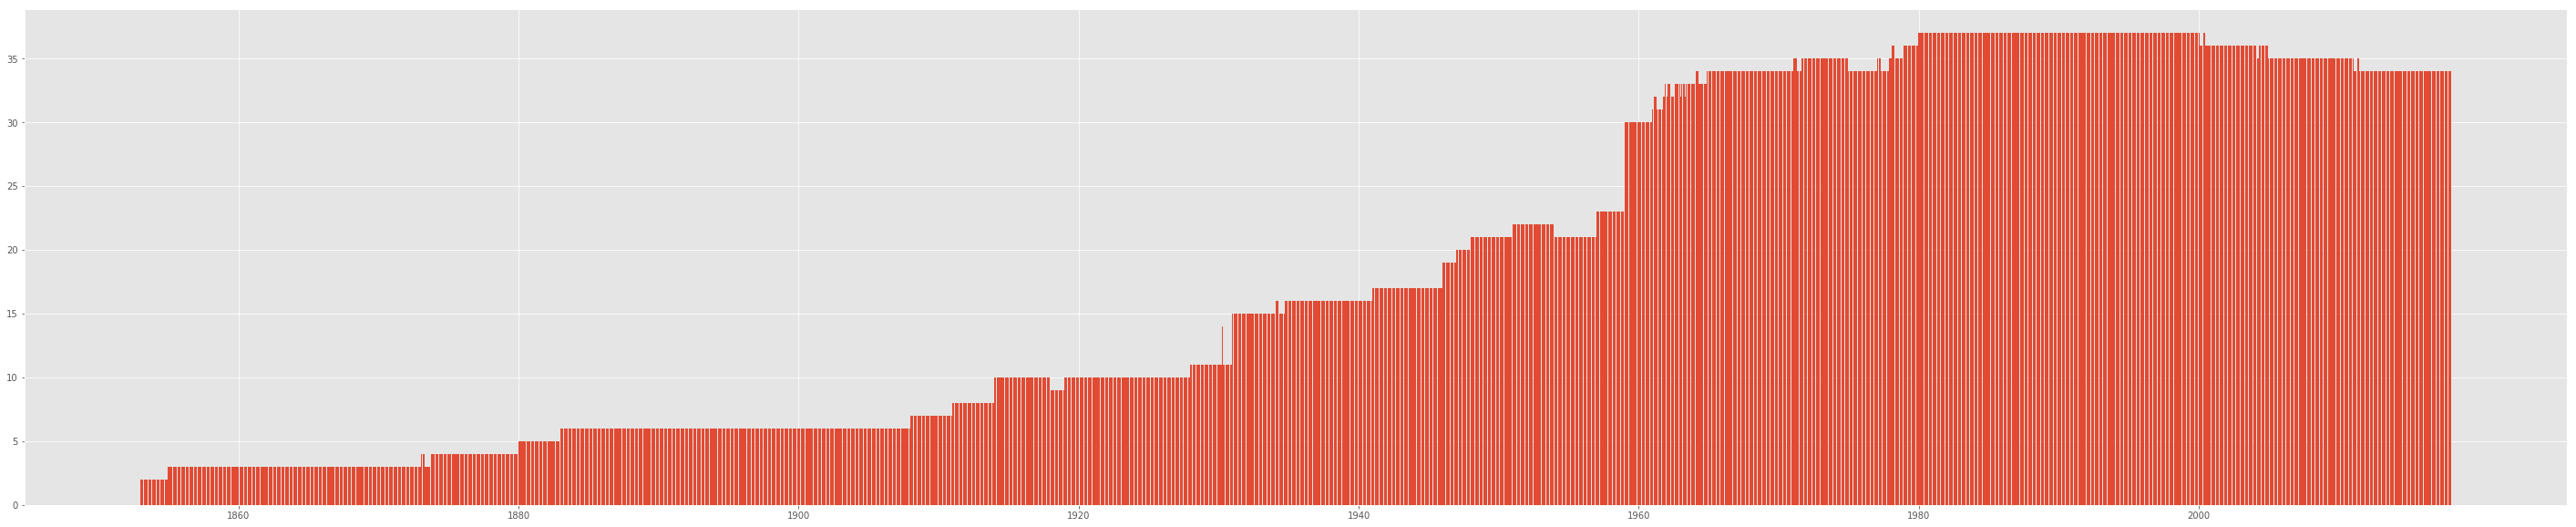

In [6]:
monthCountsLookup = {}
for iMonth in range(len(monthCounts)):
    monthCountsLookup[monthCounts[iMonth]["DISPLAY"]] = iMonth

displayYears = ["1860", "1880", "1900", "1920", "1940", "1960", "1980", "2000"]
displayMonths = []
for year in displayYears:
    displayMonths.append(monthCountsLookup[f"{year}-1"])

months = [month["DISPLAY"] for month in monthCounts]
counts = [month["COUNT"] for month in monthCounts]

rcParams["figure.figsize"] = (50, 10)
pyplot.style.use("ggplot")
#with pyplot.xkcd():
#pyplot.plot(list(range(len(display))), counts)
pyplot.bar(months, counts)
pyplot.xticks(displayMonths, displayYears)
pyplot.autoscale(enable=True, axis="both")
pyplot.show()

In [7]:
temps = []

for locationFile in locationFiles:
    with open(f"formatted_data/{locationFile}", "r", encoding="utf-8") as dataFile:
        station = locationFile.split("data.")[0]
        reader = DictReader(dataFile)
        for row in reader:
            if row["tmax_degc"] != "" and row["tmin_degc"] != "":
                temps.append({
                    "STATION": station,
                    "YEAR": row["yyyy"],
                    "MONTH": row["mm"],
                    "HIGH": float(row["tmax_degc"]),
                    "LOW": float(row["tmin_degc"]),
                    "RANGE": float(row["tmax_degc"]) - float(row["tmin_degc"])
                })

sample = 20
highest = sorted(temps, key=lambda x: (-x["HIGH"], -x["LOW"]))[:sample]
lowest = sorted(temps, key=lambda x: (x["LOW"], x["HIGH"]))[:sample]

tempsByRange = sorted(temps, key=lambda x: x["RANGE"])
mostVaried = list(reversed(tempsByRange[-sample:]))
leastVaried = tempsByRange[:sample]

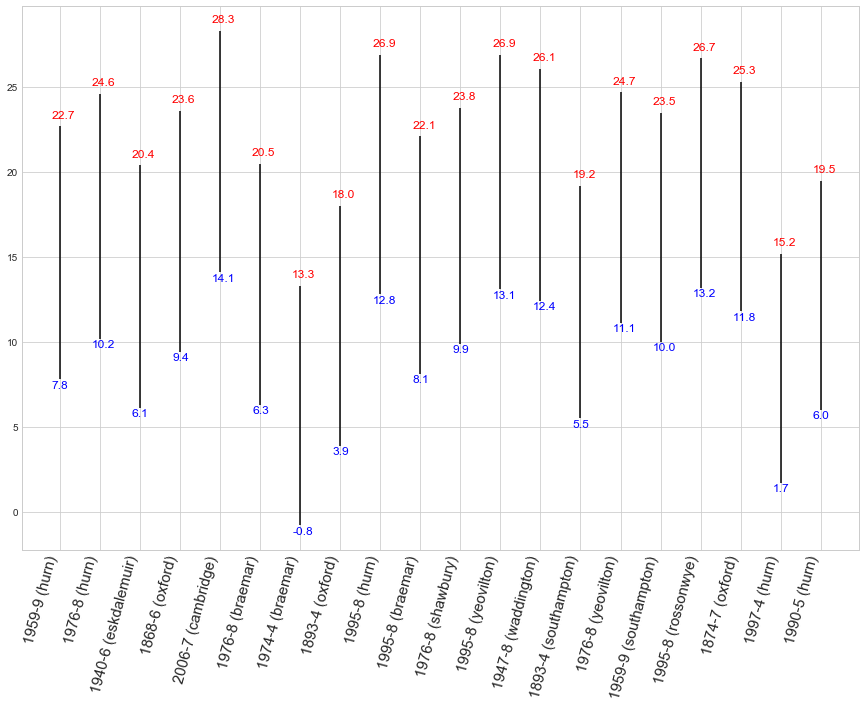

In [8]:
rcParams["figure.figsize"] = (15, 10)
pyplot.style.use("seaborn-whitegrid")

things = mostVaried

highs = [temp["HIGH"] for temp in things]
lows = [temp["LOW"] for temp in things]
labels = [temp["YEAR"] +"-"+ temp["MONTH"] +f" ({temp['STATION']})" for temp in things]
ranges = [temp["RANGE"] for temp in things]

pyplot.vlines(list(range(sample)), lows, highs, color="black")
pyplot.xticks(list(range(sample)), labels, rotation=75, ha="right", size=15)

for i in range(sample):
    pyplot.text(i - 0.2, highs[i] + 0.5, str(highs[i]), size=12, color="red")
    pyplot.text(i - 0.2, lows[i] - 0.5, str(lows[i]), size=12, color="blue")

#pyplot.plot(list(range(sample)), ranges, alpha=0.2, color="green")
pyplot.show()

In [9]:
monthNames = {}
monthNamesStr = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for i in range(1, 13):
    monthNames[str(i)] = monthNamesStr[i - 1]

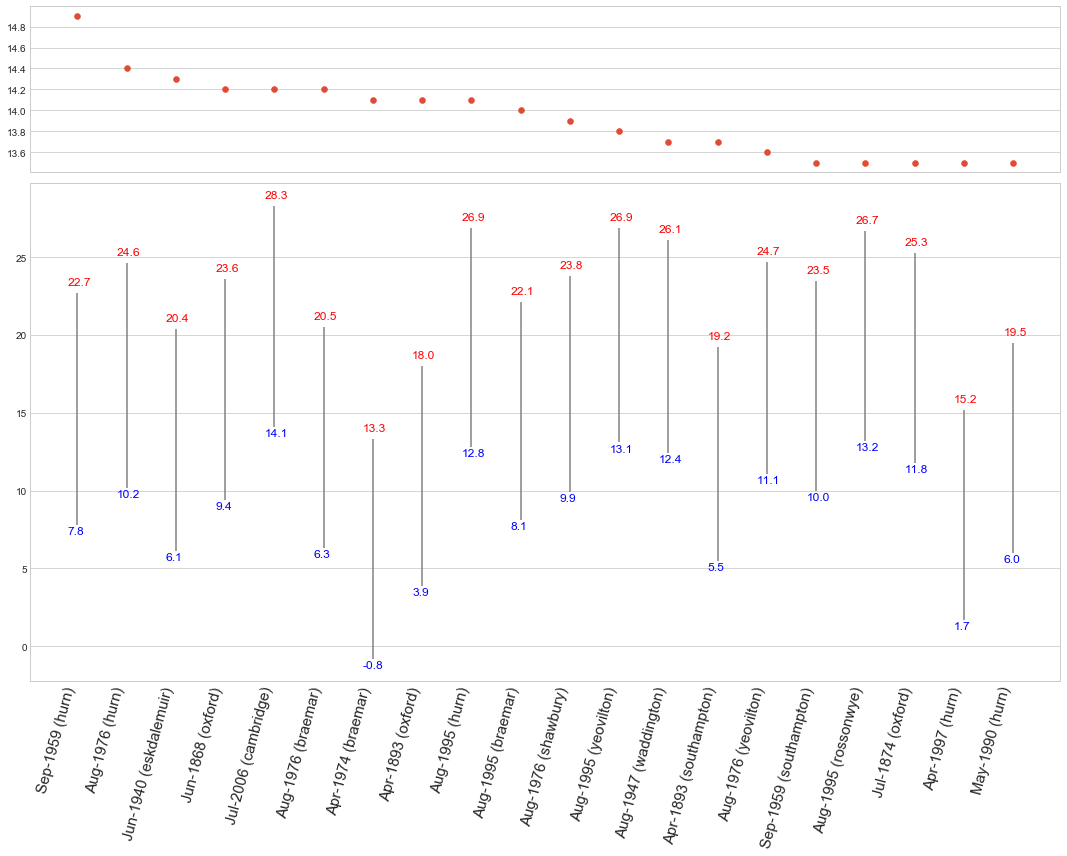

In [10]:
rcParams["figure.figsize"] = (15, 12)
pyplot.style.use("seaborn-whitegrid")

things = mostVaried

highs = [temp["HIGH"] for temp in things]
lows = [temp["LOW"] for temp in things]
labels = [monthNames[temp["MONTH"]] +"-"+ temp["YEAR"] + f" ({temp['STATION']})" for temp in things]
ranges = [temp["RANGE"] for temp in things]

#pyplot.vlines(list(range(sample)), lows, highs, color="black")
#pyplot.xticks(list(range(sample)), labels, rotation=75, ha="right", size=15)

#for i in range(sample):
#    pyplot.text(i - 0.2, highs[i] + 0.5, str(highs[i]), size=12, color="red")
#    pyplot.text(i - 0.2, lows[i] - 0.5, str(lows[i]), size=12, color="blue")

#pyplot.plot(list(range(sample)), ranges, alpha=0.2, color="green")
#pyplot.show()

fig, ax = pyplot.subplots(2, 1, sharex="all", gridspec_kw={"height_ratios": [1, 3]})

ax[0].scatter(list(range(sample)), ranges)

ax[1].vlines(list(range(sample)), lows, highs, color="grey")

ax[0].xaxis.grid(False)
ax[1].xaxis.grid(False)

for i in range(sample):
    ax[1].text(i - 0.2, highs[i] + 0.5, str(highs[i]), size=12, color="red")
    ax[1].text(i - 0.2, lows[i] - 0.6, str(lows[i]), size=12, color="blue")

pyplot.xticks(list(range(sample)), labels, rotation=75, ha="right", size=15)

fig.tight_layout()
pyplot.show()

In [11]:
def plot_temp_ranges(tempSet, title):
    global monthNames, sample
    
    rcParams["figure.figsize"] = (14, 12)
    pyplot.style.use("seaborn-whitegrid")

    highs = [temp["HIGH"] for temp in tempSet]
    lows = [temp["LOW"] for temp in tempSet]
    labels = [monthNames[temp["MONTH"]] +"-"+ temp["YEAR"] + f" ({temp['STATION']})" for temp in tempSet]
    ranges = [temp["RANGE"] for temp in tempSet]

    fig, ax = pyplot.subplots(2, 1, sharex="all", gridspec_kw={"height_ratios": [1, 3]})

    ax[0].scatter(list(range(sample)), ranges)

    ax[1].vlines(list(range(sample)), lows, highs, color="grey")

    ax[0].xaxis.grid(False)
    ax[1].xaxis.grid(False)

    for i in range(sample):
        ax[1].text(i - 0.2, highs[i] + 0.5, str(highs[i]), size=12, color="red")
        ax[1].text(i - 0.2, lows[i] - 0.8, str(lows[i]), size=12, color="blue")
    
    ax[0].set_ylim([0, 16])
    ax[1].set_ylim([-10, 30])
    
    ax[0].set_title(title, size=20)
    ax[0].set_ylabel("Range (degrees celcius)", size=13)
    ax[1].set_ylabel("High and low temperature (degrees celcius)", size=13)

    pyplot.xticks(list(range(sample)), labels, rotation=50, ha="right", size=14)
    ax[0].tick_params(axis="y", which="major", labelsize=12)
    ax[1].tick_params(axis="y", which="major", labelsize=12)
    
    ax[0].yaxis.set_major_locator(ticker.MultipleLocator(base=5.0))

    fig.tight_layout()
    pyplot.show()

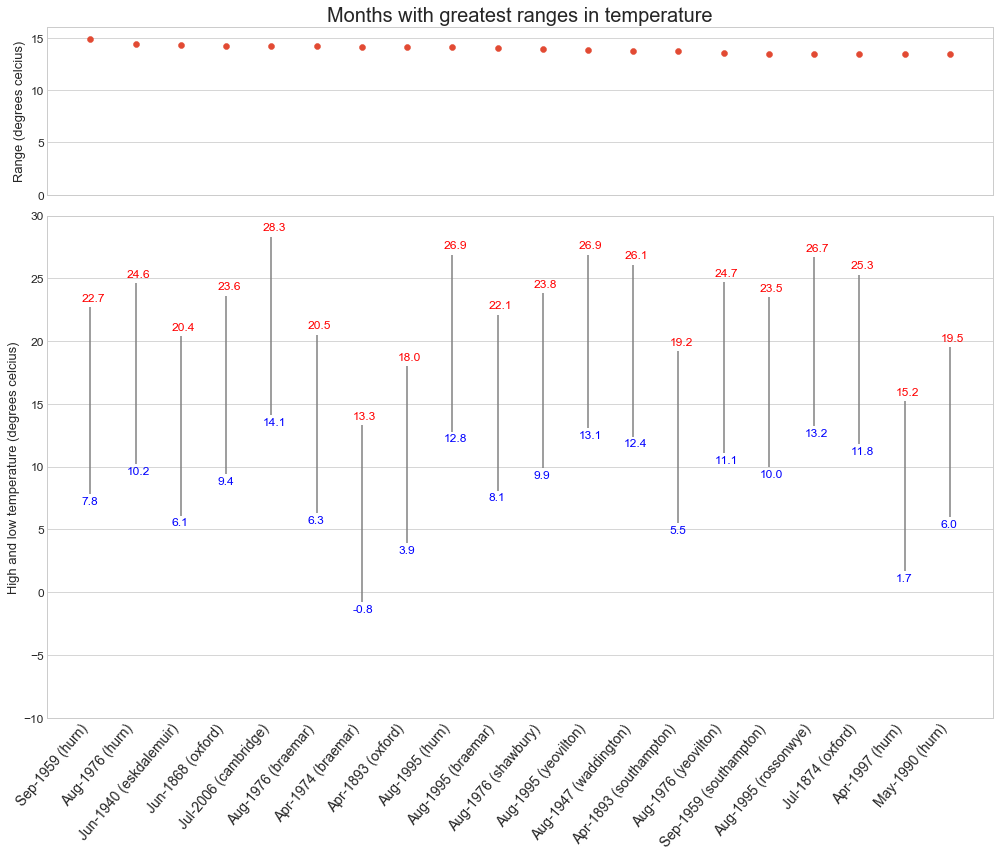

In [12]:
plot_temp_ranges(mostVaried, "Months with greatest ranges in temperature")

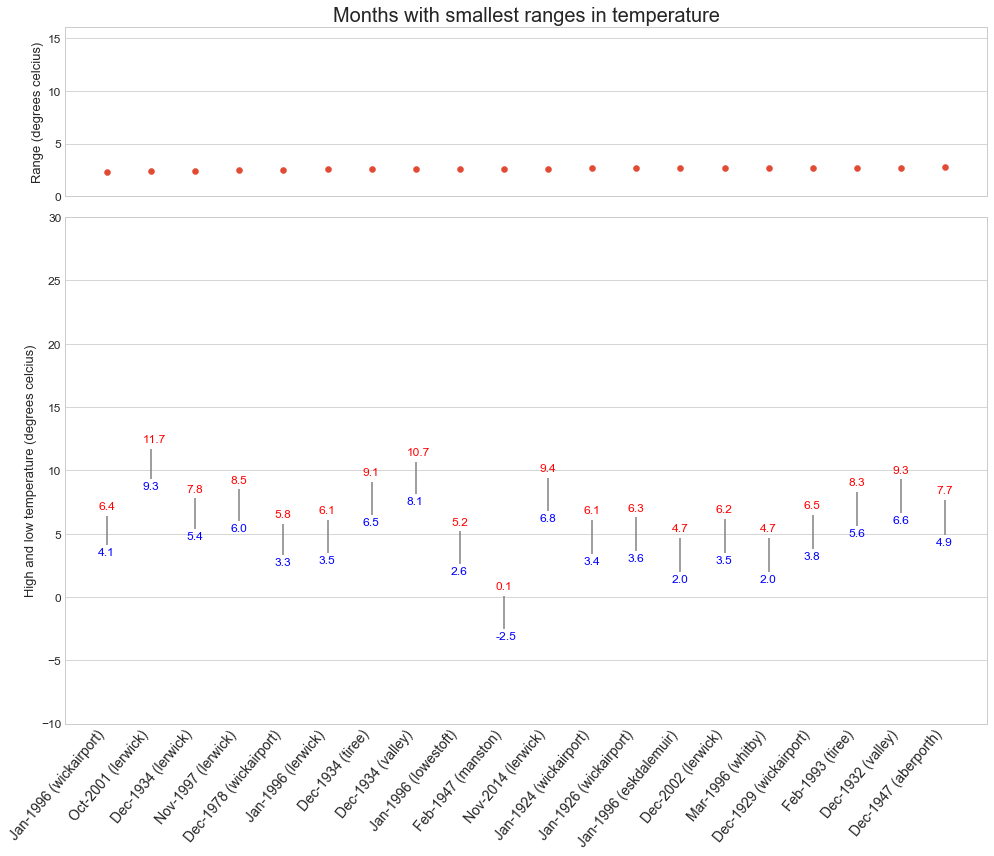

In [13]:
plot_temp_ranges(leastVaried, "Months with smallest ranges in temperature")

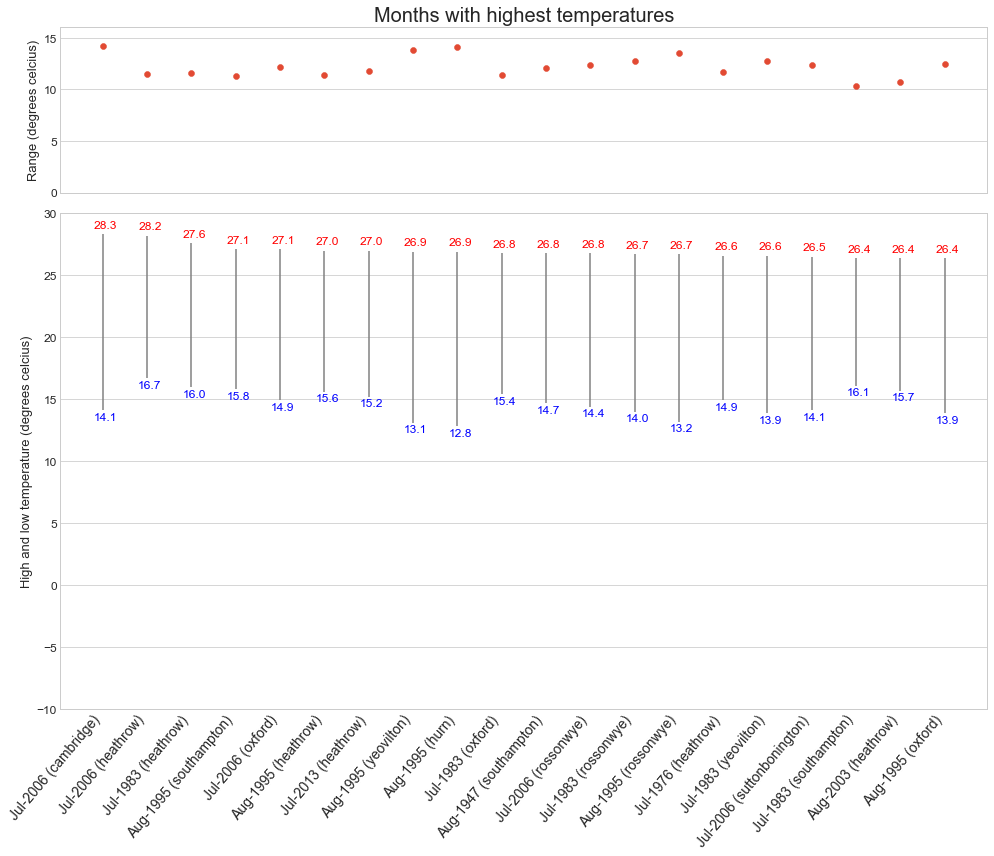

In [14]:
plot_temp_ranges(highest, "Months with highest temperatures")

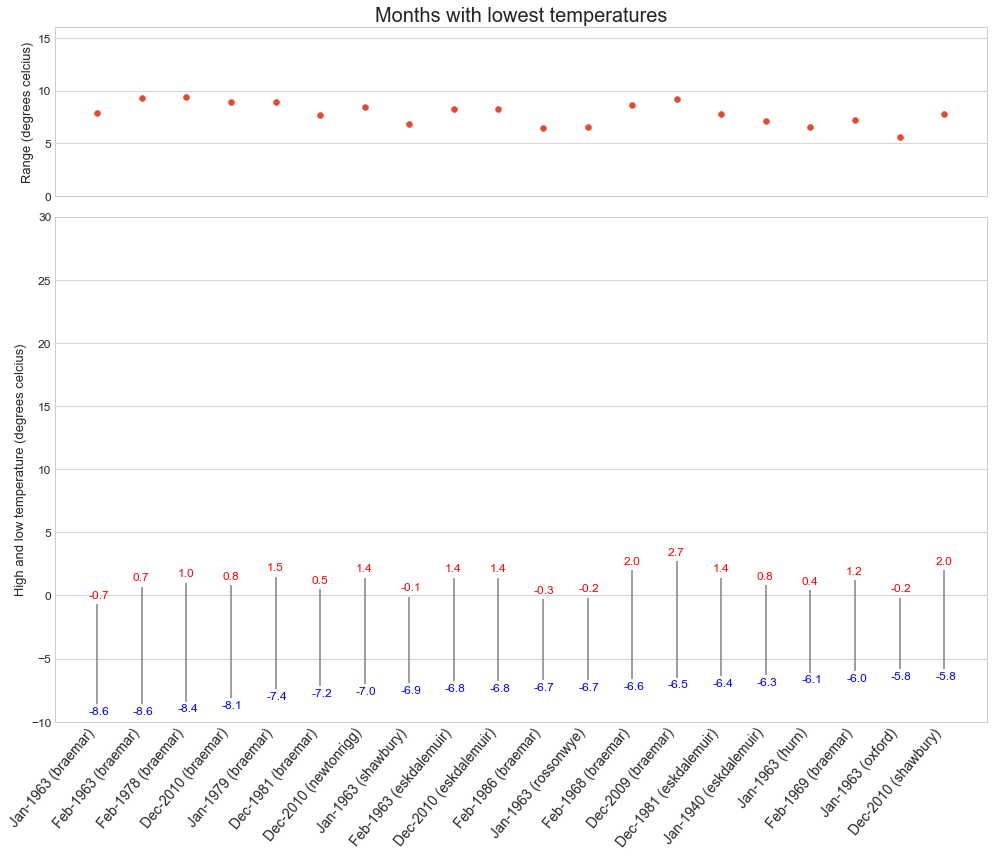

In [15]:
plot_temp_ranges(lowest, "Months with lowest temperatures")

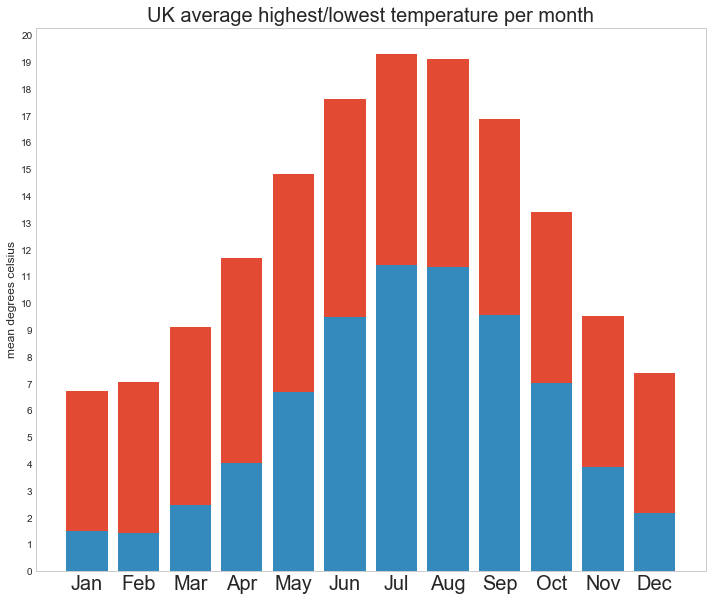

In [35]:
rcParams["figure.figsize"] = (12, 10)
monthTempsHigh = {}
monthTempsLow = {}

for i in range(1, 13):
    monthTempsHigh[str(i)] = []
    monthTempsLow[str(i)] = []

for locationFile in locationFiles:
    with open(f"formatted_data/{locationFile}", "r", encoding="utf-8") as dataFile:
        for row in DictReader(dataFile):
            if row["tmin_degc"] != "":
                monthTempsLow[row["mm"]].append(float(row["tmin_degc"]))
            if row["tmax_degc"] != "":
                monthTempsHigh[row["mm"]].append(float(row["tmax_degc"]))

monthTempsHighMeans = []
monthTempsLowMeans = []

for i in range(1, 13):
    monthTempsHighMeans.append(mean(monthTempsHigh[str(i)]))
    monthTempsLowMeans.append(mean(monthTempsLow[str(i)]))

pyplot.bar(list(range(1, 13)), monthTempsHighMeans)
pyplot.bar(list(range(1, 13)), monthTempsLowMeans)

pyplot.xticks(list(range(1, 13)), [monthNames[str(i)] for i in list(range(1, 13))], size=20)
pyplot.yticks(list(range(0, 21)))

pyplot.ylabel("mean degrees celsius")

pyplot.title("UK average highest/lowest temperature per month", size=20)

pyplot.gca().grid(False)

pyplot.show()

In [31]:
def plot_avg_month_data(columnTitle, dataType, mainTitle, yLabel, colour):
    global locationFiles, monthNames
    
    dataByMonth = {}
    for i in range(1, 13):
        dataByMonth[str(i)] = []
    
    for locationFile in locationFiles:
        with open(f"formatted_data/{locationFile}", "r", encoding="utf-8") as dataFile:
            for row in DictReader(dataFile):
                if row[columnTitle] != "" and row[columnTitle] != "-":
                    dataByMonth[row["mm"]].append(dataType(row[columnTitle]))
    
    averageDataByMonth = []
    for i in range(1, 13):
        averageDataByMonth.append(mean(dataByMonth[str(i)]))
    
    rcParams["figure.figsize"] = (12, 10)
    
    pyplot.bar(list(range(1, 13)), averageDataByMonth, color=colour)

    pyplot.xticks(list(range(1, 13)), [monthNames[str(i)] for i in list(range(1, 13))], size=20)
    #pyplot.yticks(list(range(0, 21)))
    
    pyplot.ylabel(yLabel)
    pyplot.title(mainTitle, size=20)
    
    pyplot.gca().grid(False)
    
    pyplot.show()

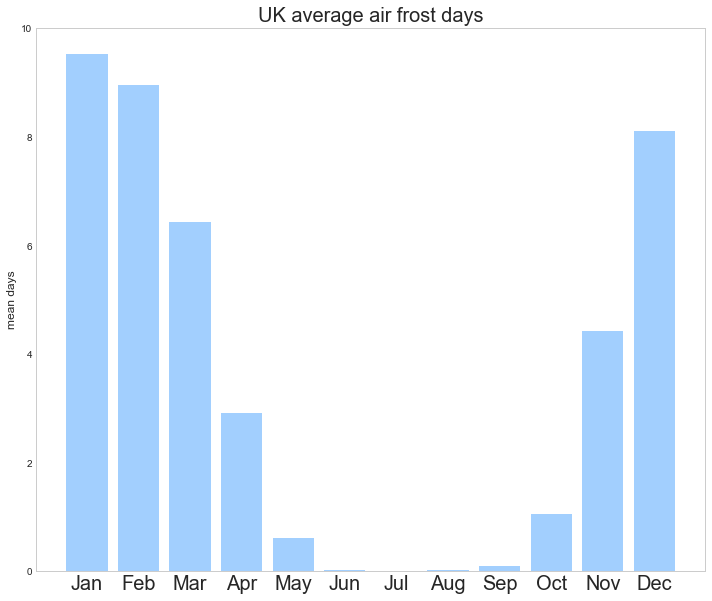

In [32]:
plot_avg_month_data("af_days", int, "UK average air frost days", "mean days", "xkcd:baby blue")

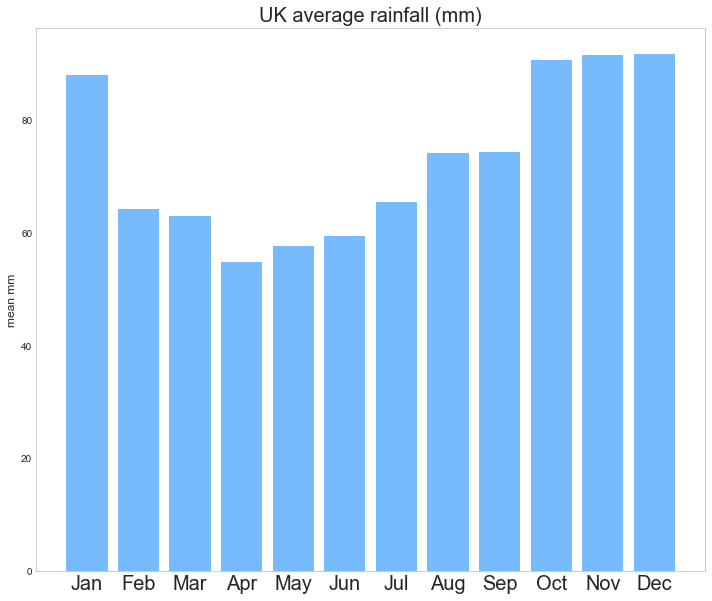

In [33]:
plot_avg_month_data("rain_mm", float, "UK average rainfall (mm)", "mean mm", "xkcd:sky blue")

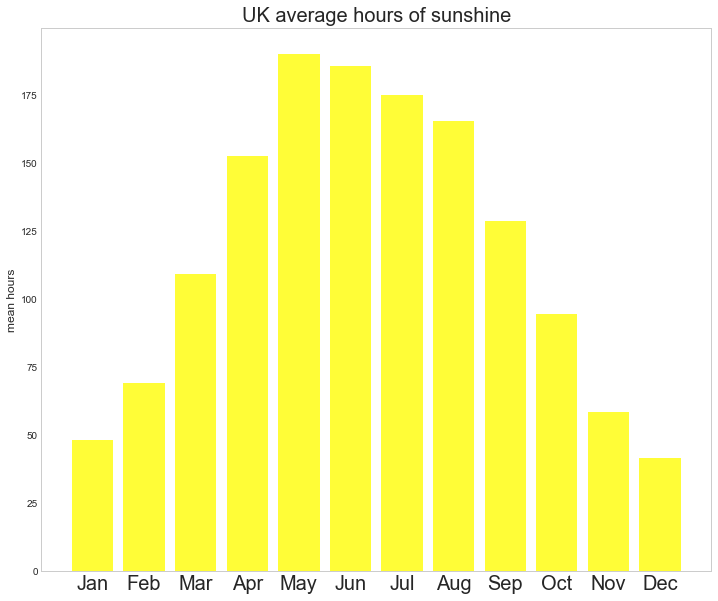

In [34]:
plot_avg_month_data("sun_hours", float, "UK average hours of sunshine", "mean hours", "xkcd:sunshine yellow")

tmax_degc -> tmin_degc

tmax_degc / tmin_degc -> af_days

tmax_degc / tmin_degc -> rain_mm

tmax_dec / tmin_degc -> sun_hours

af_days -> rain_mm

af_days -> sun_hours

rain_mm -> sun_hours

In [21]:
def scatter_two_items(csvHeading1, csvHeading2, xLabel, yLabel, dataType1=float, dataType2=float, xLim=None, yLim=None):
    global locationFiles
    
    rcParams["figure.figsize"] = (12, 12)
    
    x = []
    y = []
    
    for locationFile in locationFiles:
        with open(f"formatted_data/{locationFile}", "r", encoding="utf-8") as dataFile:
            for row in DictReader(dataFile):
                if row[csvHeading1] != "" and row[csvHeading2] != "":
                    x.append(dataType1(row[csvHeading1]))
                    y.append(dataType2(row[csvHeading2]))
    
    pyplot.scatter(x, y, marker=".", color="xkcd:almost black", edgecolors="xkcd:dark grey")
    pyplot.xlabel(xLabel, size=15)
    pyplot.ylabel(yLabel, size=15)
    
    if xLim != None:
        pyplot.xlim(xLim)
    if yLim != None:
        pyplot.ylim(yLim)
    
    pyplot.show()
    
    print(spearmanr(x, y))

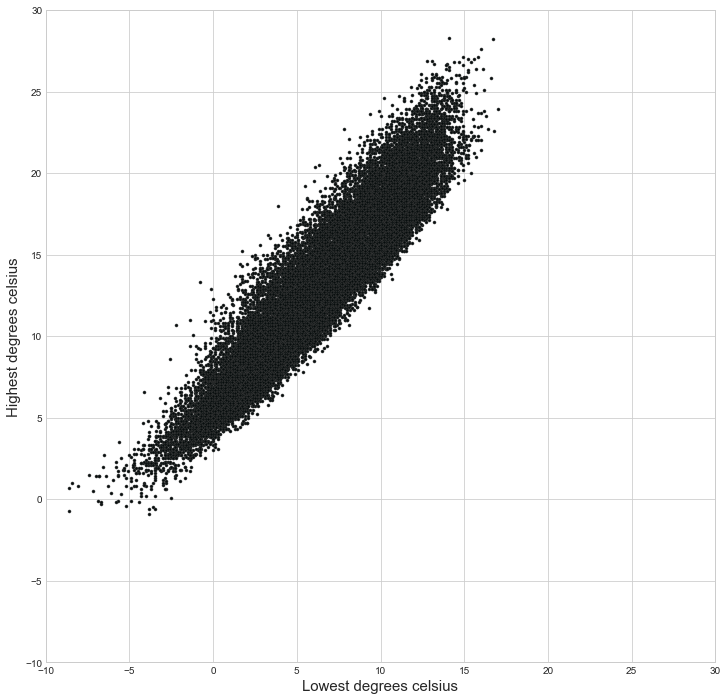

SpearmanrResult(correlation=0.94320481832957181, pvalue=0.0)


In [22]:
scatter_two_items("tmin_degc", "tmax_degc", "Lowest degrees celsius", "Highest degrees celsius", xLim=[-10, 30], yLim=[-10, 30])

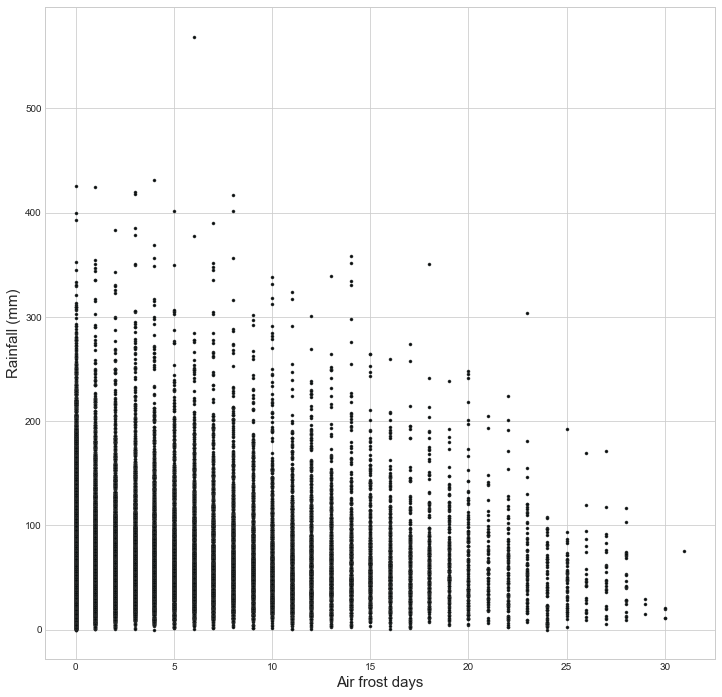

SpearmanrResult(correlation=0.00041233738374357596, pvalue=0.93957730845674869)


In [23]:
scatter_two_items("af_days", "rain_mm", "Air frost days", "Rainfall (mm)", dataType1=int)

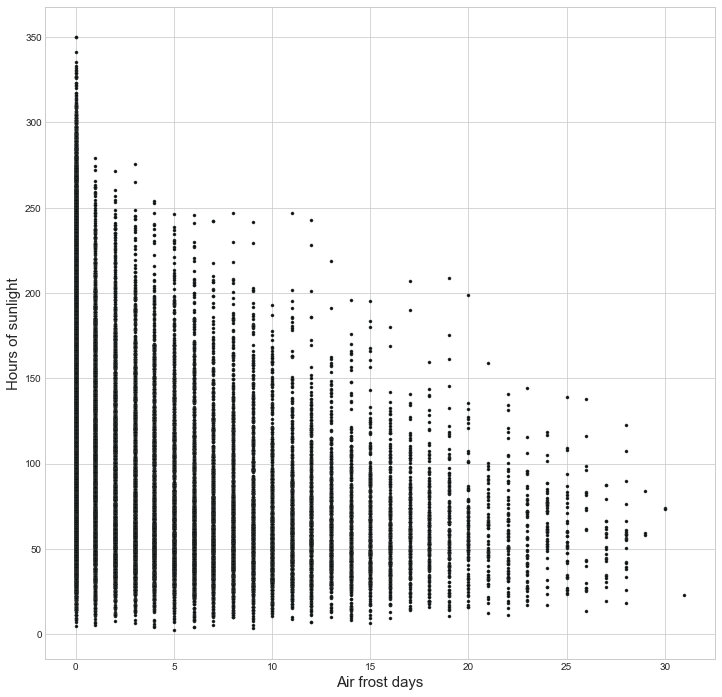

SpearmanrResult(correlation=-0.5962035039783693, pvalue=0.0)


In [24]:
scatter_two_items("af_days", "sun_hours", "Air frost days", "Hours of sunlight", dataType1=int)

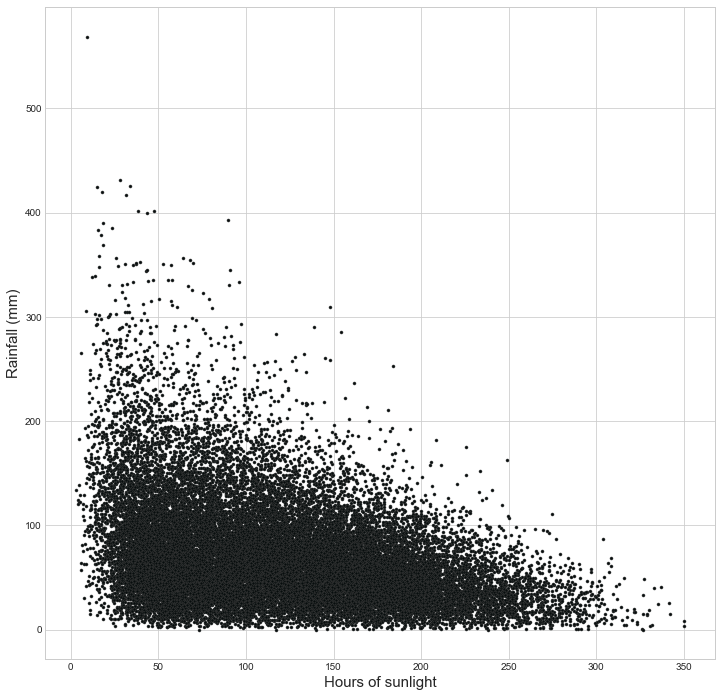

SpearmanrResult(correlation=-0.35153036221903972, pvalue=0.0)


In [25]:
scatter_two_items("sun_hours", "rain_mm", "Hours of sunlight", "Rainfall (mm)")

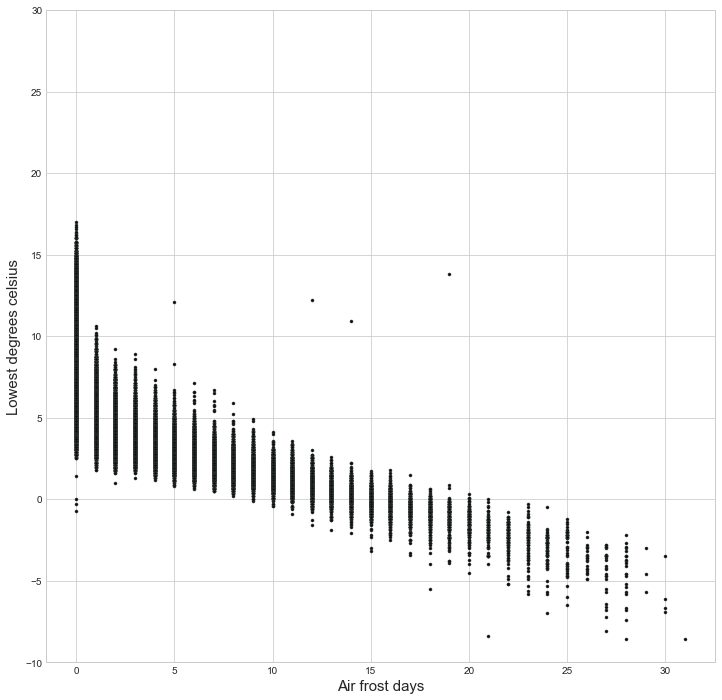

SpearmanrResult(correlation=-0.89561165415737687, pvalue=0.0)


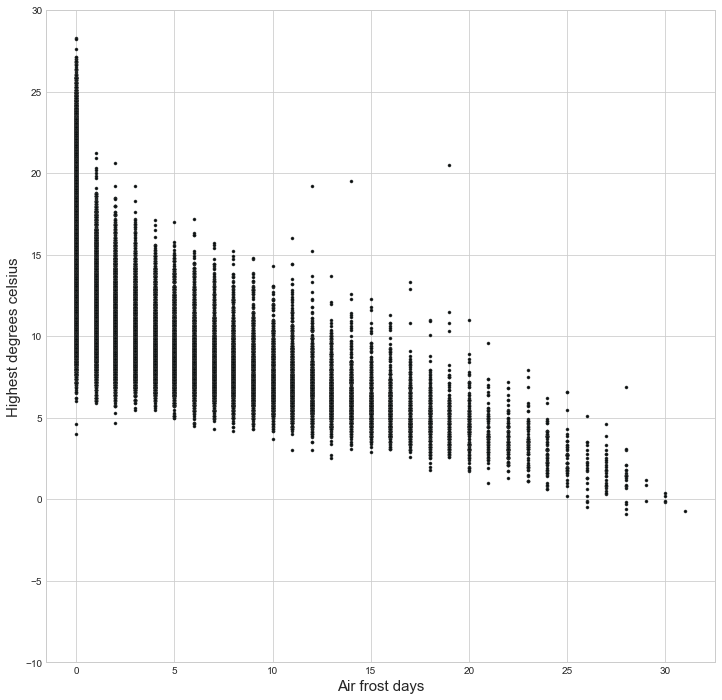

SpearmanrResult(correlation=-0.83566015363614266, pvalue=0.0)


In [26]:
scatter_two_items("af_days", "tmin_degc", "Air frost days", "Lowest degrees celsius", yLim=[-10, 30])
scatter_two_items("af_days", "tmax_degc", "Air frost days", "Highest degrees celsius", yLim=[-10, 30])

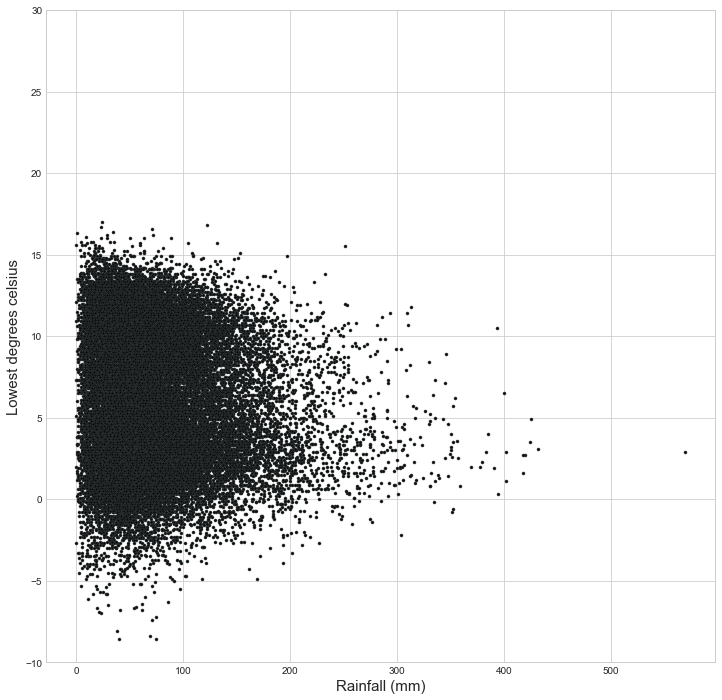

SpearmanrResult(correlation=-0.038404729068831522, pvalue=5.7004473444191163e-13)


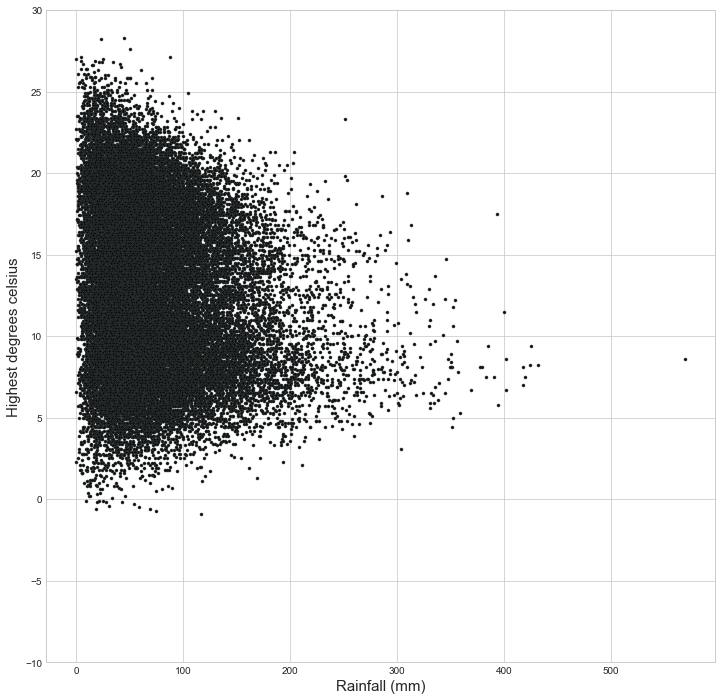

SpearmanrResult(correlation=-0.15118485692985023, pvalue=7.3035583827624106e-179)


In [27]:
scatter_two_items("rain_mm", "tmin_degc", "Rainfall (mm)", "Lowest degrees celsius", yLim=[-10, 30])
scatter_two_items("rain_mm", "tmax_degc", "Rainfall (mm)", "Highest degrees celsius", yLim=[-10, 30])

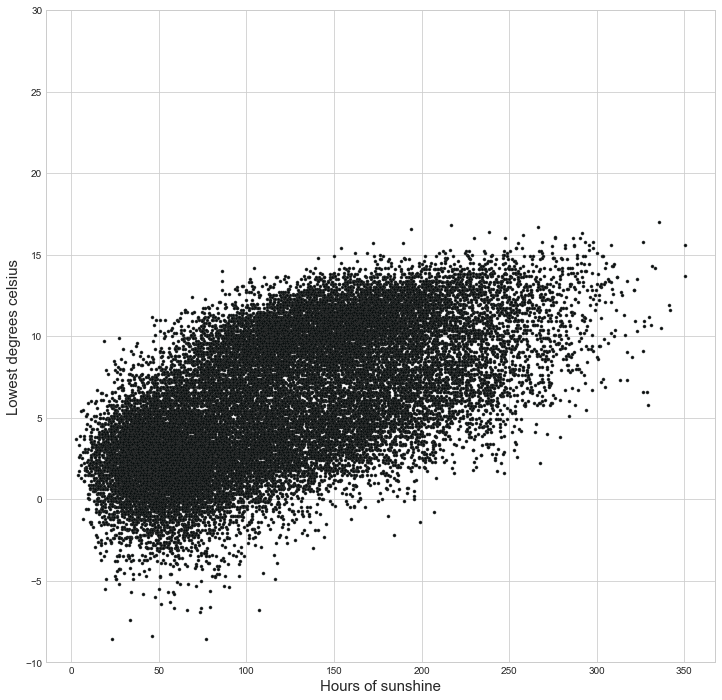

SpearmanrResult(correlation=0.64546692399874173, pvalue=0.0)


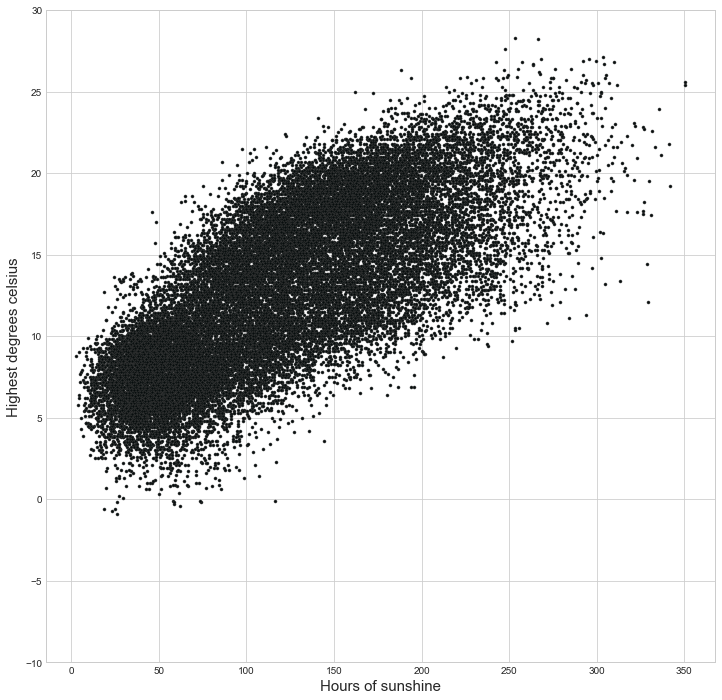

SpearmanrResult(correlation=0.7705021876488668, pvalue=0.0)


In [28]:
scatter_two_items("sun_hours", "tmin_degc", "Hours of sunshine", "Lowest degrees celsius", yLim=[-10, 30])
scatter_two_items("sun_hours", "tmax_degc", "Hours of sunshine", "Highest degrees celsius", yLim=[-10, 30])